In [1]:
import pandas as pd
import joblib
data=pd.read_csv(r"C:\Users\Admin\Downloads\DDOS.csv")


C:\Users\Admin\AppData\Local\Temp\ipykernel_7184\23442557.py:2: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(r"C:\Users\Admin\Downloads\DDOS.csv")


In [2]:
import numpy as np
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

In [9]:
value_count=data[' Label'].value_counts()

In [10]:
value_count

 Label
Syn        628710
UDP        482977
MSSQL      394035
NetBIOS    378649
LDAP       192650
Portmap    177197
BENIGN      44970
Name: count, dtype: int64

In [3]:
data=data.drop(["SimillarHTTP","Unnamed: 0"," Timestamp"," Source IP"," Destination IP","Flow Bytes/s"," Flow Packets/s"," Flow IAT Mean"," Flow IAT Std"," Flow IAT Min"," Flow IAT Max","Flow ID",' Destination Port',], axis='columns')

In [4]:
data[" Label"] = data[" Label"].replace('BENIGN',0)
data[" Label"] = data[" Label"].replace('UDP',1)
data[" Label"] = data[" Label"].replace('Syn',1)
data[" Label"] = data[" Label"].replace('MSSQL',1)
data[" Label"] = data[" Label"].replace('NetBIOS',1)
data[" Label"] = data[" Label"].replace('LDAP',1)
data[" Label"] = data[" Label"].replace('Portmap',1)
datalb=data[" Label"]
data = data.drop([" Label"], axis='columns')
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data=scaler.fit_transform(data)

In [5]:
from sklearn.model_selection import train_test_split
train_sents, test_sents, train_labels, test_labels = train_test_split(data, datalb, test_size=0.2,random_state=42)


In [28]:
#NAVIE BAYES

In [37]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB().fit(train_sents, train_labels)

In [68]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
y_pre =mnb.predict(test_sents)
print('Training size = %d, accuracy = %.2f%%' % \
      (train_sents.shape[0],accuracy_score(test_labels, y_pre)*100))
print(str(precision_score(test_labels, y_pre)))
print(str(recall_score(test_labels, y_pre)))
print(str(f1_score(test_labels, y_pre)))

Training size = 1839350, accuracy = 99.21%
0.9937630121229382
0.9982568351578163
0.9960048548039657


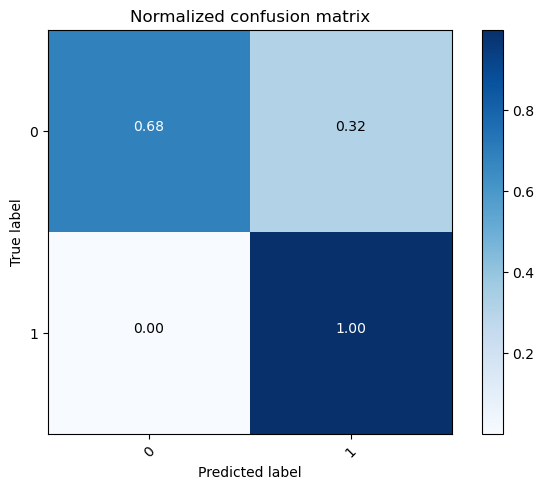

In [69]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(test_labels, y_pre)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 5)
mnbm = MultinomialNB()
scores = cross_val_score(mnbm, data, datalb, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.90220469 0.99758828 0.99999348 0.9999826  0.99964118]
Average CV Score:  0.9798820452523629
Number of CV Scores used in Average:  5


In [23]:
from sklearn.model_selection import ShuffleSplit, cross_val_score
mnbm = MultinomialNB()
ss = ShuffleSplit(train_size=0.6, test_size=0.3, n_splits = 5)
scores = cross_val_score(mnbm, data, datalb, cv = ss)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.99195514 0.99208127 0.99195659 0.99189135 0.99243357]
Average CV Score:  0.9920635818121454
Number of CV Scores used in Average:  5


In [70]:
import joblib
joblib.dump(mnb, "naviebayes.pkl") 

['naviebayes.pkl']

In [16]:
mnb=joblib.load("naviebayes.pkl")

In [71]:
#Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(train_sents, train_labels)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
y_pre =lr.predict(test_sents)
print('Training size = %d, accuracy = %.2f%%' % \
      (train_sents.shape[0],accuracy_score(test_labels, y_pre)*100))
print(str(precision_score(test_labels, y_pre)))
print(str(recall_score(test_labels, y_pre)))
print(str(f1_score(test_labels, y_pre)))

Training size = 1839350, accuracy = 99.97%
0.9997893345633239
0.9998957649521849
0.9998425469254516


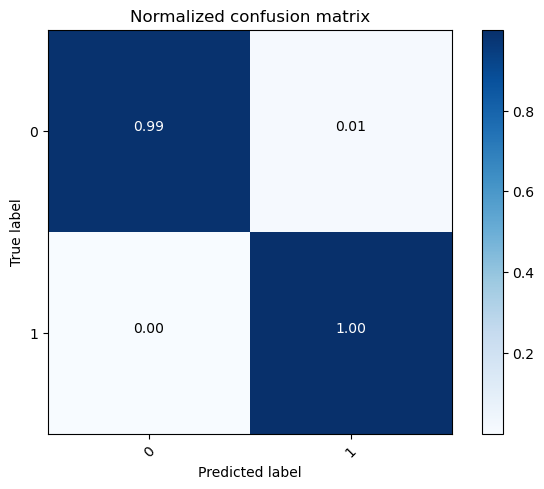

In [73]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(test_labels, y_pre)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 5)
lrm=LogisticRegression()
scores = cross_val_score(lrm, data, datalb, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Cross Validation Scores:  [       nan 0.9998021  0.99998695 0.99994998 0.99965423]
Average CV Score:  nan
Number of CV Scores used in Average:  5


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Trac

In [25]:
from sklearn.model_selection import ShuffleSplit, cross_val_score
lrm=LogisticRegression()
ss = ShuffleSplit(train_size=0.6, test_size=0.3, n_splits = 5)
scores = cross_val_score(lrm, data, datalb, cv = ss)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Cross Validation Scores:  [0.9996883  0.99973614 0.99971294 0.99969989 0.99971874]
Average CV Score:  0.9997112026409299
Number of CV Scores used in Average:  5


In [38]:
joblib.dump(lr, "LogisticRegression.pkl") 

['LogisticRegression.pkl']

In [ ]:
#K-Nearest Neighbours

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
knn.fit(train_sents, train_labels)

KNeighborsClassifier(algorithm='brute', n_jobs=-1)

In [75]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
y_pre =knn.predict(test_sents)
print('Training size = %d, accuracy = %.2f%%' % \
      (train_sents.shape[0],accuracy_score(test_labels, y_pre)*100))
print(str(precision_score(test_labels, y_pre)))
print(str(recall_score(test_labels, y_pre)))
print(str(f1_score(test_labels, y_pre)))

Training size = 1839350, accuracy = 100.00%
0.9999844757344641
0.9999911289321008
0.9999878023222162


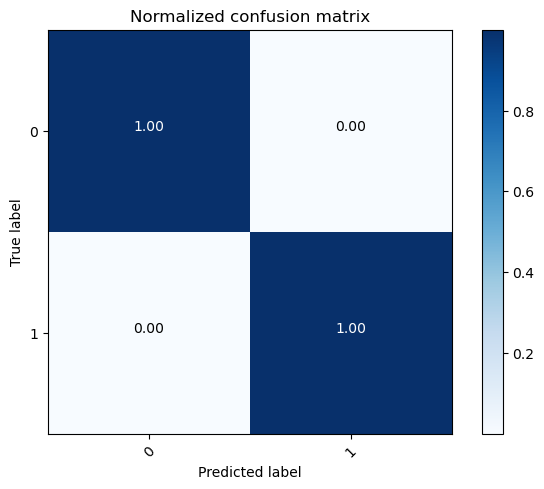

In [76]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(test_labels, y_pre)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 5)
knnm = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
scores = cross_val_score(knnm, data, datalb, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.90220469 0.99993476 0.99998913 0.99980863 0.99993911]
Average CV Score:  0.9803752624827599
Number of CV Scores used in Average:  5


In [ ]:
from sklearn.model_selection import ShuffleSplit, cross_val_score
knnm = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
ss = ShuffleSplit(train_size=0.6, test_size=0.3, n_splits = 5)
scores = cross_val_score(knnm, data, datalb, cv = ss)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [77]:
joblib.dump(knn, "knn.pkl") 

['knn.pkl']

In [ ]:
#Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(min_samples_split=10,max_depth=3)
clf.fit(train_sents, train_labels)

DecisionTreeClassifier(max_depth=3, min_samples_split=10)

In [78]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
y_pre =clf.predict(test_sents)
print('Training size = %d, accuracy = %.2f%%' % \
      (train_sents.shape[0],accuracy_score(test_labels, y_pre)*100))
print(str(precision_score(test_labels, y_pre)))
print(str(recall_score(test_labels, y_pre)))
print(str(f1_score(test_labels, y_pre)))

Training size = 1839350, accuracy = 99.99%
0.9999512071787547
0.9999112893210085
0.9999312478514953


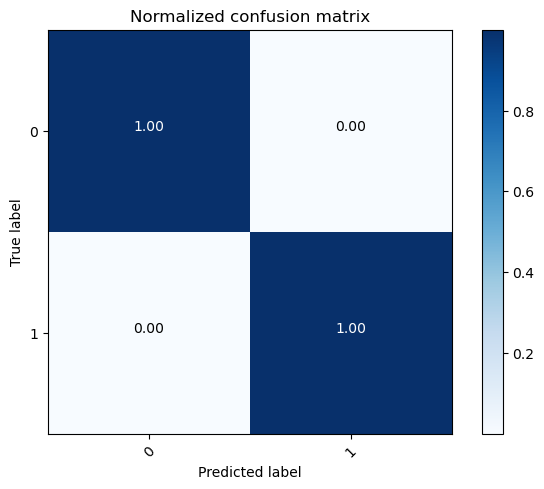

In [79]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(test_labels, y_pre)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 5)
clfm = DecisionTreeClassifier(min_samples_split=10,max_depth=3)
scores = cross_val_score(clfm, data, datalb, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.90220469 0.99984125 0.99994128 0.99991954 0.99967597]
Average CV Score:  0.9803165460860168
Number of CV Scores used in Average:  5


In [8]:
from sklearn.model_selection import ShuffleSplit, cross_val_score
clfm = DecisionTreeClassifier(min_samples_split=10,max_depth=3)
ss = ShuffleSplit(train_size=0.6, test_size=0.3, n_splits = 5)
scores = cross_val_score(clfm, data, datalb, cv = ss)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.99986517 0.99986082 0.99986662 0.99985937 0.99986372]
Average CV Score:  0.9998631402073486
Number of CV Scores used in Average:  5


In [80]:
joblib.dump(clf, "DecisionTreeClassifier.pkl") 

['DecisionTreeClassifier.pkl']

In [ ]:
#Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300,max_depth=3)
rf.fit(train_sents, train_labels)

RandomForestClassifier(max_depth=3, n_estimators=300)

In [81]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
y_pre =rf.predict(test_sents)
print('Training size = %d, accuracy = %.2f%%' % \
      (train_sents.shape[0],accuracy_score(test_labels, y_pre)*100))
print(str(precision_score(test_labels, y_pre)))
print(str(recall_score(test_labels, y_pre)))
print(str(f1_score(test_labels, y_pre)))

Training size = 1839350, accuracy = 99.89%
0.9990382804276772
0.9998602806805883
0.9994491115399494


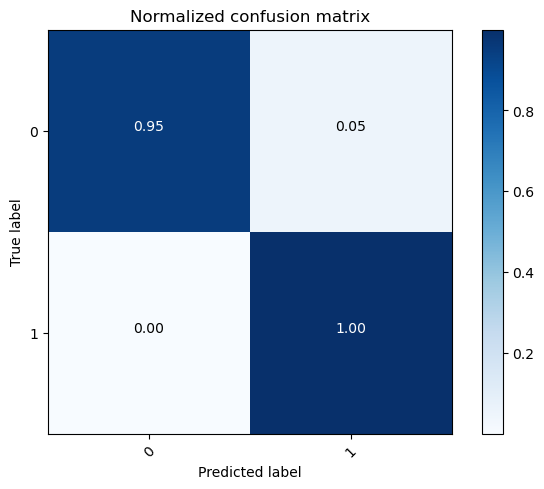

In [82]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(test_labels, y_pre)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 5)
rfm = RandomForestClassifier(n_estimators=300,max_depth=3)
scores = cross_val_score(rfm, data, datalb, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.90220469 0.9998021  0.9999826  0.99995868 0.99964988]
Average CV Score:  0.980319590642164
Number of CV Scores used in Average:  5


In [10]:
from sklearn.model_selection import ShuffleSplit, cross_val_score
rfm = RandomForestClassifier(n_estimators=300,max_depth=3)
ss = ShuffleSplit(train_size=0.6, test_size=0.3, n_splits = 5)
scores = cross_val_score(rfm, data, datalb, cv = ss)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.99914173 0.9989866  0.99908663 0.99889381 0.99887932]
Average CV Score:  0.9989976180017021
Number of CV Scores used in Average:  5


In [83]:
joblib.dump(rf, "RandomForestClassifier.pkl") 

['RandomForestClassifier.pkl']

In [47]:
#SVM

In [39]:
from sklearn.svm import LinearSVC
poly_kernel_svm_clf =LinearSVC(C=0.0001)
poly_kernel_svm_clf.fit(train_sents, train_labels)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC(C=0.0001)

In [40]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
y_pre =poly_kernel_svm_clf.predict(test_sents)
print('Training size = %d, accuracy = %.2f%%' % \
      (train_sents.shape[0],accuracy_score(test_labels, y_pre)*100))
print(str(precision_score(test_labels, y_pre)))
print(str(recall_score(test_labels, y_pre)))
print(str(f1_score(test_labels, y_pre)))

Training size = 1839350, accuracy = 99.89%
0.9996206356460509
0.9992880968010929
0.9994543385629585


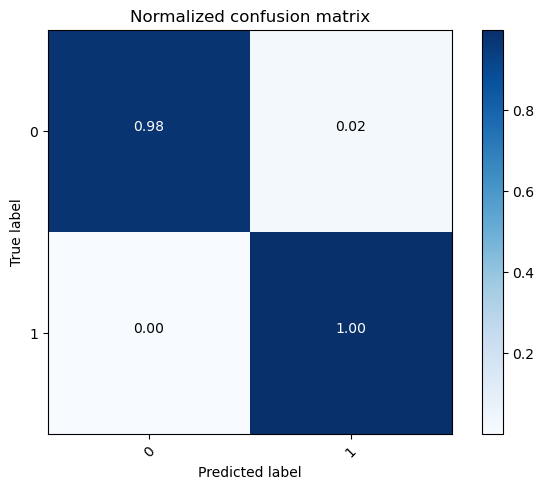

In [41]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(test_labels, y_pre)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

In [5]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 5)
poly_kernel_svm_clfm =LinearSVC(C=0.0001)
scores = cross_val_score(poly_kernel_svm_clfm, data, datalb, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [       nan 0.99999348 1.         0.99992824 0.99992606]
Average CV Score:  nan
Number of CV Scores used in Average:  5


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final_estimator.fit(Xt

In [6]:
from sklearn.model_selection import ShuffleSplit, cross_val_score
poly_kernel_svm_clfm =LinearSVC(C=0.0001)
ss = ShuffleSplit(train_size=0.6, test_size=0.3, n_splits = 5)
scores = cross_val_score(poly_kernel_svm_clfm, data, datalb, cv = ss)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.99996521 0.9999681  0.99995361 0.9999768  0.99996086]
Average CV Score:  0.9999649151802735
Number of CV Scores used in Average:  5


In [42]:
joblib.dump(poly_kernel_svm_clf, "svm.pkl") 

['svm.pkl']

In [ ]:
#Boosting Decision Tree

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 5)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=100,learning_rate=0.5)
scores = cross_val_score(ada_clf, data, datalb, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=100,learning_rate=0.5)
ss = ShuffleSplit(train_size=0.6, test_size=0.3, n_splits = 5)
scores = cross_val_score(ada_clf, data, datalb, cv = ss)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=100,learning_rate=0.5)
ada_clf.fit(train_sents, train_labels)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.5, n_estimators=100)

In [44]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
y_pre =ada_clf.predict(test_sents)
print('Training size = %d, accuracy = %.2f%%' % \
      (train_sents.shape[0],accuracy_score(test_labels, y_pre)*100))
print(str(precision_score(test_labels, y_pre)))
print(str(recall_score(test_labels, y_pre)))
print(str(f1_score(test_labels, y_pre)))

Training size = 1839350, accuracy = 100.00%
0.9999955644857242
1.0
0.9999977822379437


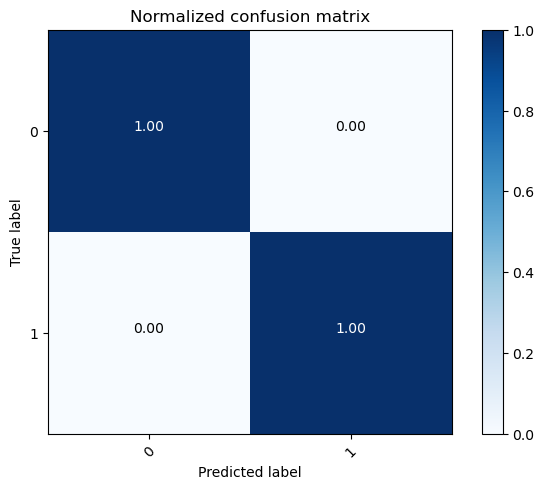

In [45]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(test_labels, y_pre)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

In [51]:
joblib.dump(ada_clf, "adaboost.pkl") 

['adaboost.pkl']

In [ ]:
#Deep Neural Network

In [8]:
def my_confusion_matrix(y_true, y_pred):
    N = np.unique(y_true).shape[0] # number of classes 
    cm = np.zeros((N, N))
    for n in range(y_true.shape[0]):
        cm[y_true[n], y_pred[n]] += 1
    return cm 

In [9]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, GlobalMaxPooling1D,Bidirectional
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model
from sklearn.metrics import roc_auc_score
from tensorflow import keras

In [4]:
def DNN(input_size):
    model = keras.Sequential()
    model.add(Dense(28 , input_shape=(75,) , activation="relu" , name="Hidden_Layer_1"))
    model.add(Dense(10 , activation="relu" , name="Hidden_Layer_2"))
    model.add(Dense(1 , activation="sigmoid" , name="Output_Layer"))
    return model

In [5]:
def compile_train(model,X_train,y_train,deep=True, epochs=10):

    if(deep==True):
        import matplotlib.pyplot as plt
        opt = keras.optimizers.Adam(learning_rate=0.01)
        model.compile( optimizer=opt, loss="binary_crossentropy", metrics=['accuracy'])
        history = model.fit(X_train, y_train,epochs=epochs, batch_size=512, verbose=1)

        # summarize history for accuracy
        plt.plot(history.history['accuracy'])
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train'], loc='upper left')
        plt.show()
        # summarize history for loss
        plt.plot(history.history['loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train'], loc='upper left')
        plt.show()

        print(model.metrics_names)

    else:
        model.fit(X_train, y_train) #SVM, LR, GD

    print('Model Compiled and Trained')
    return model

In [6]:
def save_model(model,name):
    from keras.models import model_from_json

    arq_json = 'Models' + name + '.json'
    model_json = model.to_json()
    with open(arq_json,"w") as json_file:
        json_file.write(model_json)

    arq_h5 = 'Models' + name + '.h5'
    model.save_weights(arq_h5)
    print('Model Saved')

def load_model(name):
    from keras.models import model_from_json

    arq_json = 'Models' + name + '.json'
    json_file = open(arq_json,'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)

    arq_h5 = 'Models' + name + '.h5'
    loaded_model.load_weights(arq_h5)

    print('Model loaded')

    return loaded_model

In [7]:
from keras.models import Sequential
from tensorflow import keras
from keras.layers import Dense,Embedding,Dropout,Flatten,MaxPooling1D,LSTM

In [8]:
def format_3d(df):
    X = np.array(df)
    return np.reshape(X, (X.shape[0], X.shape[1], 1))

Epoch 1/10


3593/3593 [==============================] - 6s 2ms/step - loss: 0.0029 - accuracy: 0.9992
Epoch 2/10
3593/3593 [==============================] - 5s 1ms/step - loss: 6.4377e-04 - accuracy: 0.9998
Epoch 3/10
3593/3593 [==============================] - 4s 1ms/step - loss: 3.8589e-04 - accuracy: 0.9999
Epoch 4/10
3593/3593 [==============================] - 4s 1ms/step - loss: 2.7687e-04 - accuracy: 0.9999
Epoch 5/10
3593/3593 [==============================] - 4s 1ms/step - loss: 2.2209e-04 - accuracy: 0.9999
Epoch 6/10
3593/3593 [==============================] - 4s 1ms/step - loss: 2.1499e-04 - accuracy: 1.0000
Epoch 7/10
3593/3593 [==============================] - 4s 1ms/step - loss: 1.8299e-04 - accuracy: 1.0000
Epoch 8/10
3593/3593 [==============================] - 5s 1ms/step - loss: 1.9399e-04 - accuracy: 1.0000
Epoch 9/10
3593/3593 [==============================] - 6s 2ms/step - loss: 1.7936e-04 - accuracy: 1.0000
Epoch 10/10
3593/3593 [=========================

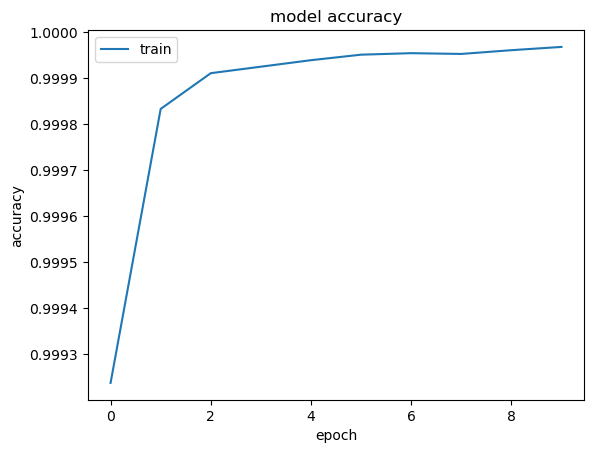

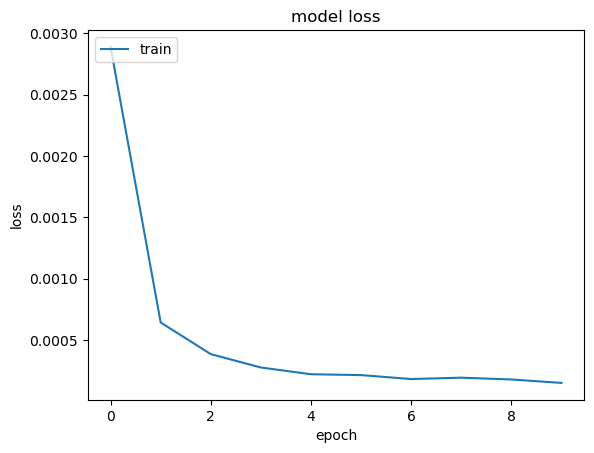

['loss', 'accuracy']
Model Compiled and Trained


In [21]:
from tensorflow.keras.models import Sequential
DNNm = DNN(75)
DNNm =compile_train(DNNm,format_3d(train_sents),train_labels)

In [22]:
save_model(DNNm,"DNN")

Model Saved


In [182]:
dnn=load_model("DNN")

Model loaded


In [183]:
opt = keras.optimizers.Adam(learning_rate=0.01)
dnn.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])

In [185]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
y_pred =dnn.predict(test_sents).round()
print('Training size = %d, accuracy = %.2f%%' % \
      (train_sents.shape[0],accuracy_score(test_labels, y_pred)*100))
print(str(precision_score(test_labels, y_pred)))
print(str(recall_score(test_labels, y_pred)))
print(str(f1_score(test_labels, y_pred)))

14370/14370 [==============================] - 17s 1ms/step
Training size = 1839350, accuracy = 99.99%
0.9999379058297555
0.9999911289321008
0.9999645166727283


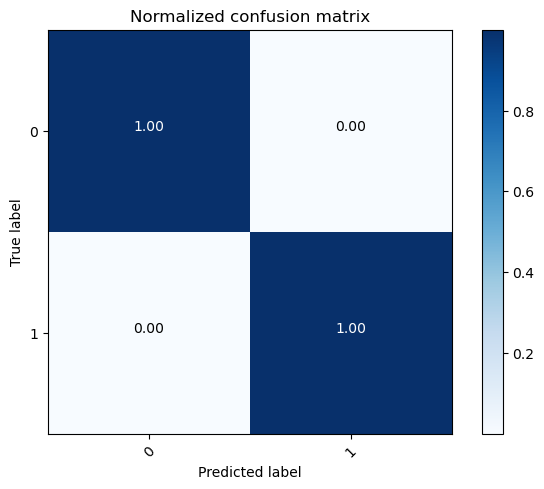

In [186]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(test_labels, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')